# Statistical Arbitrage Strategy Implementation

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from src.trading_strategy import TradingStrategy 
from src.back_testing import BackTesting
from src.config import tokens_price, tokens_largest_cap
print("Modules Imported")

Modules Imported


Read in and clean dataset

In [2]:
# Read in prices and largest-cap tokens data
tokens_price = pd.read_csv(tokens_price)
tokens_largest_cap = pd.read_csv(tokens_largest_cap)

# Convert the column 'startTime' to datetime object
tokens_price['startTime'] = pd.to_datetime(tokens_price['startTime'])
tokens_largest_cap['startTime'] = pd.to_datetime(tokens_largest_cap['startTime'])

# Set the 'startTime' column as the index
tokens_price.set_index('startTime', inplace=True)
tokens_largest_cap.set_index('startTime', inplace=True)
tokens_largest_cap

,time,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
startTime,,,,,,,,,,,,,,,,,,,,,
2021-02-19 05:00:00+00:00,1.613711e+12,BTC,BNB,XRP,LTC,LINK,BCH,DOGE,UNI,AAVE,...,ASD,SXP,SRM,TOMO,PERP,BADGER,TRU,LINA,MAPS,FIDA
2021-02-19 06:00:00+00:00,1.613714e+12,BTC,BNB,XRP,LTC,LINK,BCH,DOGE,UNI,AAVE,...,ASD,SXP,SRM,TOMO,PERP,BADGER,TRU,LINA,MAPS,FIDA
2021-02-19 07:00:00+00:00,1.613718e+12,BTC,BNB,XRP,LTC,LINK,BCH,DOGE,UNI,AAVE,...,ASD,SXP,SRM,TOMO,PERP,BADGER,TRU,LINA,MAPS,FIDA
2021-02-19 08:00:00+00:00,1.613722e+12,BTC,BNB,XRP,LTC,LINK,BCH,DOGE,UNI,AAVE,...,ASD,SXP,SRM,TOMO,PERP,BADGER,TRU,LINA,MAPS,FIDA
2021-02-19 09:00:00+00:00,1.613725e+12,BTC,BNB,XRP,LTC,LINK,BCH,DOGE,UNI,AAVE,...,ASD,SXP,SRM,TOMO,PERP,BADGER,TRU,LINA,MAPS,FIDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25 23:00:00+00:00,1.664147e+12,BTC,ETH,BNB,XRP,SOL,DOGE,DOT,SHIB,TRX,...,FTM,SNX,COMP,GMT,1INCH,CRV,RSR,GALA,FXS,SRM
2022-09-26 00:00:00+00:00,1.664150e+12,BTC,ETH,BNB,XRP,SOL,DOGE,DOT,SHIB,TRX,...,FTM,SNX,COMP,GMT,1INCH,CRV,RSR,GALA,FXS,SRM
2022-09-26 01:00:00+00:00,1.664154e+12,BTC,ETH,BNB,XRP,SOL,DOGE,DOT,SHIB,TRX,...,FTM,SNX,COMP,GMT,1INCH,CRV,RSR,GALA,FXS,SRM


Pick a start time and window

In [3]:
# Pick a start time any time around 2021
start_time = datetime.strptime('2021-10-20 03:00:00+00:00', '%Y-%m-%d %H:%M:%S%z')
M = 240
test = TradingStrategy(tokens_price, tokens_largest_cap, start_time, M)
signals = test.generate_signals()
signals

,time,Token,trading_signal,s_score
0,2021-10-20 03:00:00+00:00,BTC,close_all,0.246440
1,2021-10-20 03:00:00+00:00,CEL,buy_open,-1.446532
2,2021-10-20 03:00:00+00:00,SUSHI,close_all,0.718244
3,2021-10-20 03:00:00+00:00,COMP,close_all,-0.446896
4,2021-10-20 03:00:00+00:00,BNB,buy_open,-1.354860
5,2021-10-20 03:00:00+00:00,SNX,close_all,-0.293698
6,2021-10-20 03:00:00+00:00,CHZ,buy_open,-1.607214
7,2021-10-20 03:00:00+00:00,ENJ,close_all,0.301681
8,2021-10-20 03:00:00+00:00,HT,close_long,1.166654
9,2021-10-20 03:00:00+00:00,DYDX,buy_open,-1.772058


Run a testing period from 2021-09-26 00:00:00 to 2022-09-25 23:00:00.

In [4]:
start_time = '2021-09-26 00:00:00+00:00'
end_time = '2022-09-25 05:00:00+00:00'
backtest = BackTesting(start_time, end_time, M, tokens_largest_cap, tokens_price)

2021-09-26 00:00:00+00:00
2021-09-26 01:00:00+00:00
2021-09-26 02:00:00+00:00
2021-09-26 03:00:00+00:00
2021-09-26 04:00:00+00:00
2021-09-26 05:00:00+00:00
2021-09-26 06:00:00+00:00
2021-09-26 07:00:00+00:00
2021-09-26 08:00:00+00:00
2021-09-26 09:00:00+00:00
2021-09-26 10:00:00+00:00
2021-09-26 11:00:00+00:00
2021-09-26 12:00:00+00:00
2021-09-26 13:00:00+00:00
2021-09-26 14:00:00+00:00
2021-09-26 15:00:00+00:00
2021-09-26 16:00:00+00:00
2021-09-26 17:00:00+00:00
2021-09-26 18:00:00+00:00
2021-09-26 19:00:00+00:00
2021-09-26 20:00:00+00:00
2021-09-26 21:00:00+00:00
2021-09-26 22:00:00+00:00
2021-09-26 23:00:00+00:00
2021-09-27 00:00:00+00:00
2021-09-27 01:00:00+00:00
2021-09-27 02:00:00+00:00
2021-09-27 03:00:00+00:00
2021-09-27 04:00:00+00:00
2021-09-27 05:00:00+00:00
2021-09-27 06:00:00+00:00
2021-09-27 07:00:00+00:00
2021-09-27 08:00:00+00:00
2021-09-27 09:00:00+00:00
2021-09-27 10:00:00+00:00
2021-09-27 11:00:00+00:00
2021-09-27 12:00:00+00:00
2021-09-27 13:00:00+00:00
2021-09-27 1

/Users/fenggao/Desktop/ISYE6767SystemDesign/Statistical-Arbitrage-Strategy/Utility.py:151: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(residuals_variance / (1 - b**2))


2021-10-09 10:00:00+00:00
2021-10-09 11:00:00+00:00
2021-10-09 12:00:00+00:00
2021-10-09 13:00:00+00:00
2021-10-09 14:00:00+00:00
2021-10-09 15:00:00+00:00
2021-10-09 16:00:00+00:00
2021-10-09 17:00:00+00:00
2021-10-09 18:00:00+00:00
2021-10-09 19:00:00+00:00
2021-10-09 20:00:00+00:00
2021-10-09 21:00:00+00:00
2021-10-09 22:00:00+00:00
2021-10-09 23:00:00+00:00
2021-10-10 00:00:00+00:00
2021-10-10 01:00:00+00:00
2021-10-10 02:00:00+00:00
2021-10-10 03:00:00+00:00
2021-10-10 04:00:00+00:00
2021-10-10 05:00:00+00:00
2021-10-10 06:00:00+00:00
2021-10-10 07:00:00+00:00
2021-10-10 08:00:00+00:00
2021-10-10 09:00:00+00:00
2021-10-10 10:00:00+00:00
2021-10-10 11:00:00+00:00
2021-10-10 12:00:00+00:00
2021-10-10 13:00:00+00:00
2021-10-10 14:00:00+00:00
2021-10-10 15:00:00+00:00
2021-10-10 16:00:00+00:00
2021-10-10 17:00:00+00:00
2021-10-10 18:00:00+00:00
2021-10-10 19:00:00+00:00
2021-10-10 20:00:00+00:00
2021-10-10 21:00:00+00:00
2021-10-10 22:00:00+00:00
2021-10-10 23:00:00+00:00
2021-10-11 0

/Users/fenggao/Desktop/ISYE6767SystemDesign/Statistical-Arbitrage-Strategy/Utility.py:151: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(residuals_variance / (1 - b**2))


2021-11-06 10:00:00+00:00
2021-11-06 11:00:00+00:00
2021-11-06 12:00:00+00:00
2021-11-06 13:00:00+00:00
2021-11-06 14:00:00+00:00
2021-11-06 15:00:00+00:00
2021-11-06 16:00:00+00:00
2021-11-06 17:00:00+00:00
2021-11-06 18:00:00+00:00
2021-11-06 19:00:00+00:00
2021-11-06 20:00:00+00:00
2021-11-06 21:00:00+00:00
2021-11-06 22:00:00+00:00
2021-11-06 23:00:00+00:00
2021-11-07 00:00:00+00:00
2021-11-07 01:00:00+00:00
2021-11-07 02:00:00+00:00
2021-11-07 03:00:00+00:00
2021-11-07 04:00:00+00:00
2021-11-07 05:00:00+00:00
2021-11-07 06:00:00+00:00
2021-11-07 07:00:00+00:00
2021-11-07 08:00:00+00:00
2021-11-07 09:00:00+00:00
2021-11-07 10:00:00+00:00
2021-11-07 11:00:00+00:00
2021-11-07 12:00:00+00:00
2021-11-07 13:00:00+00:00
2021-11-07 14:00:00+00:00
2021-11-07 15:00:00+00:00
2021-11-07 16:00:00+00:00
2021-11-07 17:00:00+00:00
2021-11-07 18:00:00+00:00
2021-11-07 19:00:00+00:00
2021-11-07 20:00:00+00:00
2021-11-07 21:00:00+00:00
2021-11-07 22:00:00+00:00
2021-11-07 23:00:00+00:00
2021-11-08 0

# Task1a

In [6]:
portfolios_df = backtest.eigen_vectors_portfolios_df
portfolios_df['time'] = pd.to_datetime(portfolios_df['time'])
portfolios_df.set_index('time', inplace=True)
eigenportfolio1_df = portfolios_df.pivot(columns='common_tokens', values='eigenportfolio1')
eigenportfolio2_df = portfolios_df.pivot(columns='common_tokens', values='eigenportfolio2')
eigenportfolio1_df.to_csv("eigenportfolio1.csv")
eigenportfolio2_df.to_csv("eigenportfolio2.csv")

In [31]:
eigenvector1_df = portfolios_df.pivot(columns='common_tokens', values='eigenvectors1')
eigenvector2_df = portfolios_df.pivot(columns='common_tokens', values='eigenvectors2')
eigenvector1_df.to_csv("eigenvector1.csv")
eigenvector2_df.to_csv("eigenvector2.csv")

# Task1b

In [7]:
all_returns = tokens_price.pct_change()
all_returns = all_returns.fillna(0)
all_returns

,time,1INCH,AAVE,AGLD,ALCX,ALGO,ALICE,ALPHA,AMPL,APE,...,TRU,TRX,TRYB,UNI,WAVES,XAUT,XRP,YFI,YFII,ZRX
startTime,,,,,,,,,,,,,,,,,,,,,
2021-02-19 05:00:00+00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-02-19 06:00:00+00:00,0.0,0.010555,0.002540,0.000000,0.000000,0.000000,0.000000,0.014744,0.021093,0.000000,...,0.037486,0.055811,-0.001336,-0.005948,0.041611,-0.000056,0.004234,0.001057,0.004862,0.000000
2021-02-19 07:00:00+00:00,0.0,0.006378,0.011332,0.000000,0.000000,0.000000,0.000000,-0.013899,0.017960,0.000000,...,0.008632,0.009075,0.001408,0.008976,0.007830,0.000112,0.011796,0.008445,0.002966,0.000000
2021-02-19 08:00:00+00:00,0.0,0.000914,0.017515,0.000000,0.000000,0.000000,0.000000,-0.000032,-0.020293,0.000000,...,0.012040,0.036098,0.000000,-0.010841,0.017362,-0.001459,0.007023,-0.002326,0.002646,0.000000
2021-02-19 09:00:00+00:00,0.0,-0.004313,-0.013155,0.000000,0.000000,0.000000,0.000000,0.006744,-0.002536,0.000000,...,-0.039624,-0.016720,0.002812,0.008846,0.021001,0.000000,-0.002836,-0.001749,-0.016298,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25 23:00:00+00:00,0.0,0.006047,0.002178,0.012012,0.000000,0.006008,0.002967,0.001442,0.011394,0.027692,...,-0.009598,0.000168,-0.001490,-0.002990,0.001936,-0.000305,-0.004708,-0.004938,-0.005509,0.004677
2022-09-26 00:00:00+00:00,0.0,0.002672,0.000272,-0.002967,0.004975,0.009608,0.000000,-0.000960,-0.005934,0.010955,...,-0.002307,0.001803,0.000000,-0.001940,0.003220,0.000000,0.000102,0.002481,0.001166,0.002793
2022-09-26 01:00:00+00:00,0.0,-0.001332,-0.005976,-0.008929,0.009901,-0.012860,-0.008876,-0.009606,0.000000,-0.011798,...,0.000925,-0.004563,0.000560,-0.014316,-0.007832,-0.009935,0.001373,0.000000,0.002912,-0.010214


In [25]:

eigenportfolio1_df.fillna(0, inplace=True)

# Calculate the absolute row sums
row_sums = eigenportfolio1_df.sum(axis=1)

# Divide each element by its row sum
eigenportfolio1_scaled = eigenportfolio1_df.div(row_sums, axis=0)
token_name = eigenportfolio1_scaled.columns
eigenportfolio1_returns = all_returns[token_name]
eigenportfolio1_returns = eigenportfolio1_returns.loc[eigenportfolio1_scaled.index.tolist()]
returns1 = eigenportfolio1_scaled.multiply(eigenportfolio1_returns).sum(axis=1)
returns1.replace([np.inf, -np.inf], np.nan, inplace=True)
# Replace NaN values with 0
returns1.fillna(0, inplace=True)
cum_return1 = (1 + returns1).cumprod() - 1
cum_return1.name = 'eigenportfolio1'
cum_return1

time
2021-09-26 01:00:00+00:00   -0.016453
2021-09-26 02:00:00+00:00   -0.026330
2021-09-26 03:00:00+00:00   -0.034014
2021-09-26 04:00:00+00:00   -0.024187
2021-09-26 05:00:00+00:00   -0.023767
                               ...   
2022-09-25 02:00:00+00:00   -0.662164
2022-09-25 03:00:00+00:00   -0.662474
2022-09-25 04:00:00+00:00   -0.659980
2022-09-25 05:00:00+00:00   -0.660366
2022-09-25 06:00:00+00:00   -0.660910
Name: eigenportfolio1, Length: 8742, dtype: float64

<Axes: xlabel='time'>

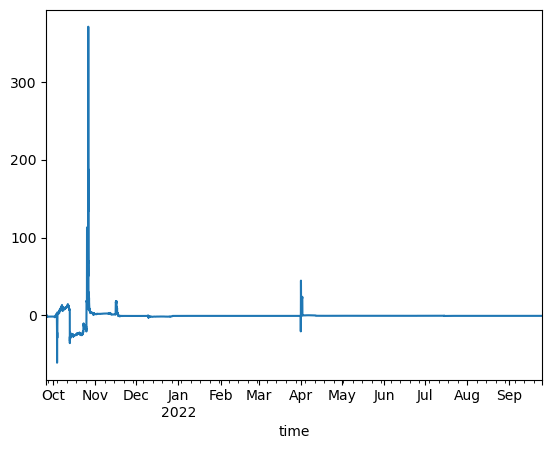

In [26]:
eigenportfolio2_df.fillna(0, inplace=True)

# Calculate the absolute row sums
row_sums = eigenportfolio2_df.sum(axis=1)

# Divide each element by its row sum
eigenportfolio2_scaled = eigenportfolio2_df.div(row_sums, axis=0)
token_name = eigenportfolio2_scaled.columns
eigenportfolio2_returns = all_returns[token_name]
eigenportfolio2_returns = eigenportfolio2_returns.loc[eigenportfolio2_scaled.index.tolist()]
returns2 = eigenportfolio2_scaled.multiply(eigenportfolio2_returns).sum(axis=1)
returns2.replace([np.inf, -np.inf], np.nan, inplace=True)
# Replace NaN values with 0
returns2.fillna(0, inplace=True)
cum_return2 = (1 + returns2).cumprod() - 1
cum_return2.name = 'eigenportfolio2'
cum_return2.plot()

In [27]:
btc_return = all_returns.loc[eigenportfolio2_scaled.index.tolist(), 'BTC']
eth_return = all_returns.loc[eigenportfolio2_scaled.index.tolist(), 'ETH']
btc_cum_ret = (1 + btc_return).cumprod() - 1
eth_cum_ret = (1 + eth_return).cumprod() - 1

<Axes: >

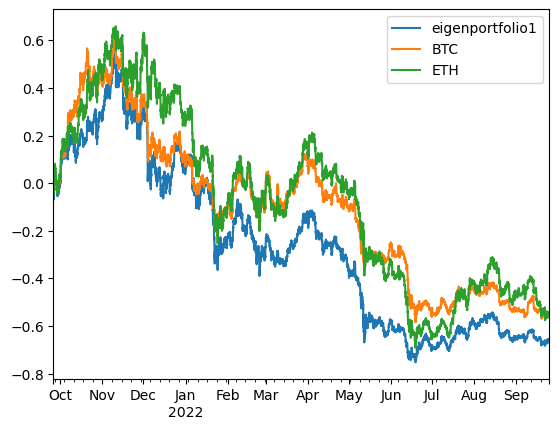

In [28]:
result = pd.concat([cum_return1, btc_cum_ret, eth_cum_ret], axis=1)
result.plot()

# Task2

Eigenportfolio1's Graph

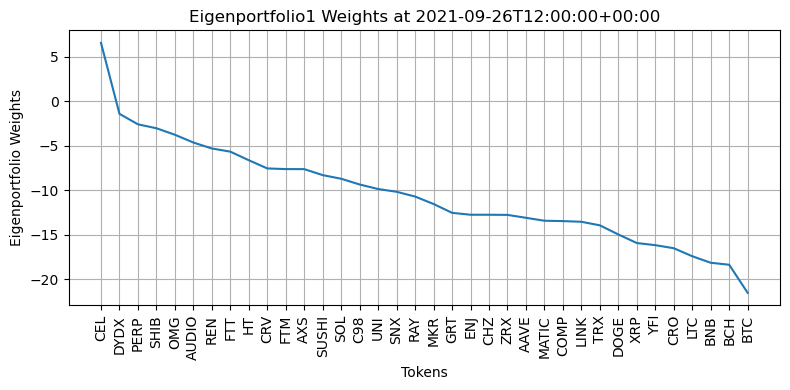

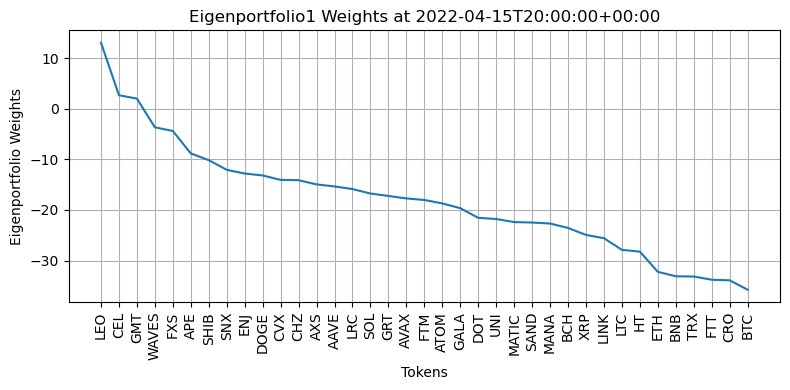

In [29]:
import matplotlib.pyplot as plt

# Convert 'time' to datetime and set as index for easier slicing
# portfolios_df['time'] = pd.to_datetime(portfolios_df['time'])
# portfolios_df.set_index('time', inplace=True)

# Extract the specific timestamps for plotting
time1 = '2021-09-26T12:00:00+00:00'
time2 = '2022-04-15T20:00:00+00:00'

# Slice the DataFrame for the two specified timestamps
portfolio_time1 = portfolios_df.loc[time1].set_index('common_tokens').sort_values(by='eigenportfolio1', ascending=False)
portfolio_time2 = portfolios_df.loc[time2].set_index('common_tokens').sort_values(by='eigenportfolio1', ascending=False)

# Define a function to create bar plots for eigenportfolio weights
def plot_eigenportfolio_weights(portfolio, title):
    plt.figure(figsize=(8, 4))
    plt.plot(portfolio.index, portfolio['eigenportfolio1'])
    plt.title(title)
    plt.xlabel('Tokens')
    plt.ylabel('Eigenportfolio Weights')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()

# Plot for the first timestamp
plot_eigenportfolio_weights(portfolio_time1, f'Eigenportfolio1 Weights at {time1}')

# Plot for the second timestamp
plot_eigenportfolio_weights(portfolio_time2, f'Eigenportfolio1 Weights at {time2}')

# Show plots
plt.show()


Eigenportfolio2's Graph

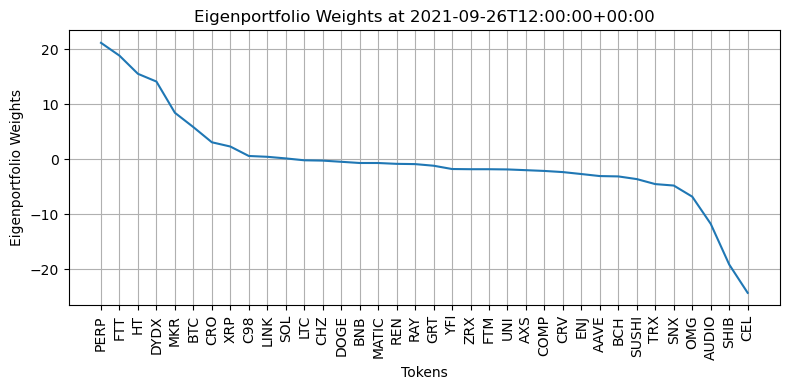

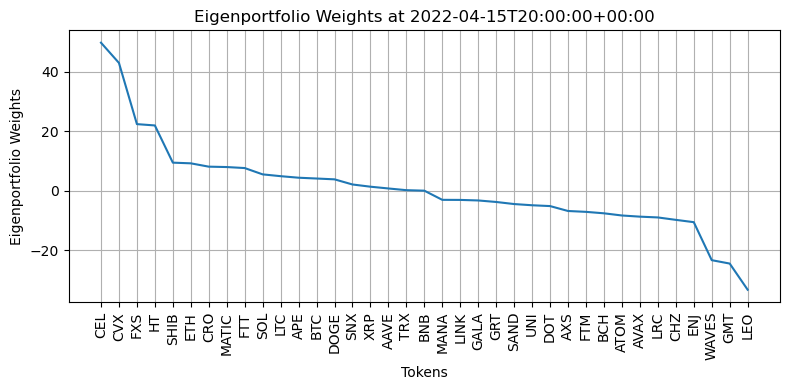

In [14]:

portfolios_df = backtest.eigen_vectors_portfolios_df
# Convert 'time' to datetime and set as index for easier slicing
# portfolios_df['time'] = pd.to_datetime(portfolios_df['time'])
# portfolios_df.set_index('time', inplace=True)

# Extract the specific timestamps for plotting
time1 = '2021-09-26T12:00:00+00:00'
time2 = '2022-04-15T20:00:00+00:00'

# Slice the DataFrame for the two specified timestamps
portfolio_time1 = portfolios_df.loc[time1].set_index('common_tokens').sort_values(by='eigenportfolio2', ascending=False)
portfolio_time2 = portfolios_df.loc[time2].set_index('common_tokens').sort_values(by='eigenportfolio2', ascending=False)

# Define a function to create bar plots for eigenportfolio weights
def plot_eigenportfolio_weights(portfolio, title):
    plt.figure(figsize=(8, 4))
    plt.plot(portfolio.index, portfolio['eigenportfolio2'])
    plt.title(title)
    plt.xlabel('Tokens')
    plt.ylabel('Eigenportfolio Weights')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()

# Plot for the first timestamp
plot_eigenportfolio_weights(portfolio_time1, f'Eigenportfolio2 Weights at {time1}')

# Plot for the second timestamp
plot_eigenportfolio_weights(portfolio_time2, f'Eigenportfolio2 Weights at {time2}')

# Show plots
plt.show()

# Task3

In [15]:
df = backtest.signals_df
btc_df = df[(df['Token'] == 'BTC') & (df['time'] >= '2021-09-26 00:00:00') & (df['time'] <= '2021-10-25 23:00:00')]
eth_df = df[(df['Token'] == 'ETH') & (df['time'] >= '2021-09-26 00:00:00') & (df['time'] <= '2021-10-25 23:00:00')]

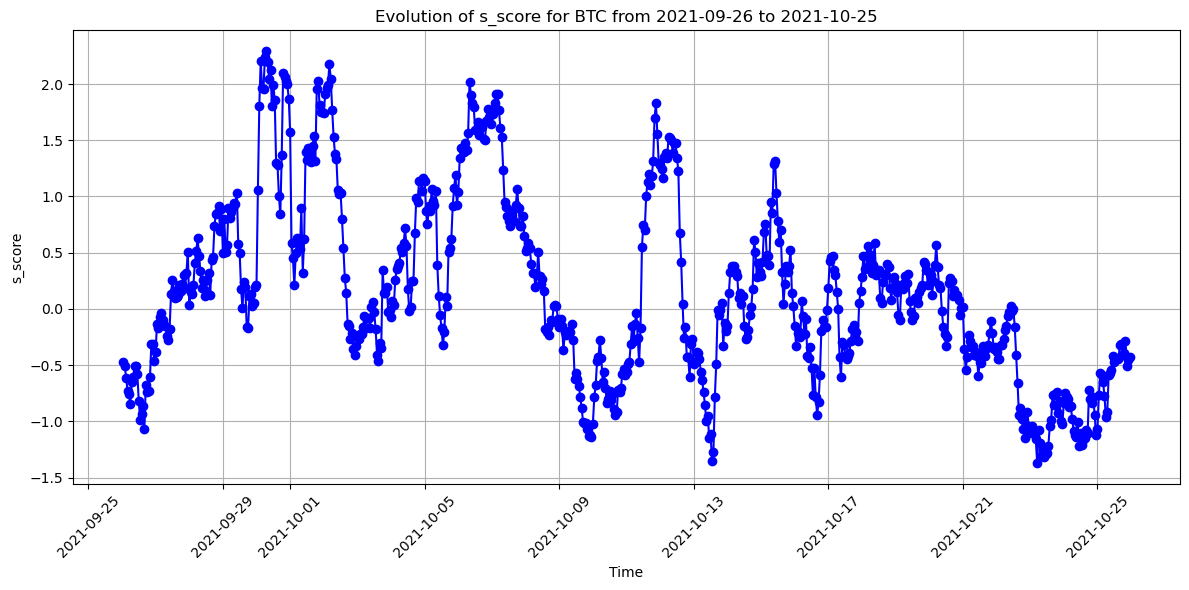

In [16]:
import matplotlib.pyplot as plt

# Plotting the evolution of s_score for BTC
plt.figure(figsize=(12, 6))
plt.plot(btc_df['time'], btc_df['s_score'], marker='o', linestyle='-', color='b')
plt.title('Evolution of s_score for BTC from 2021-09-26 to 2021-10-25')
plt.xlabel('Time')
plt.ylabel('s_score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

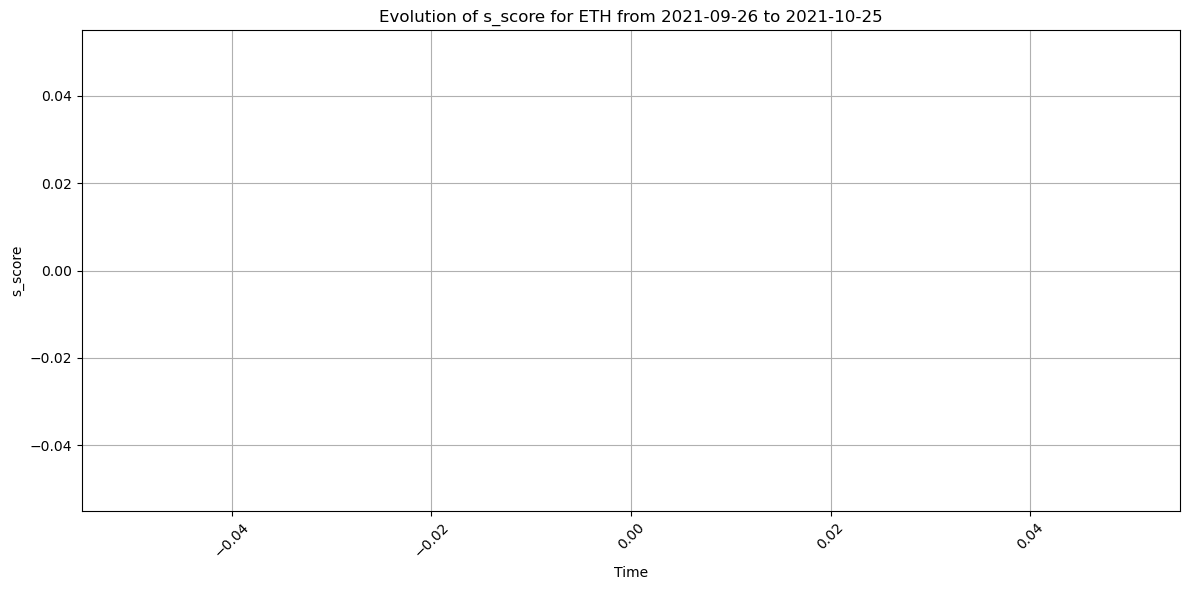

In [17]:
# Plotting the evolution of s_score for BTC
plt.figure(figsize=(12, 6))
plt.plot(eth_df['time'], eth_df['s_score'], marker='o', linestyle='-', color='b')
plt.title('Evolution of s_score for ETH from 2021-09-26 to 2021-10-25')
plt.xlabel('Time')
plt.ylabel('s_score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Task 4

In [18]:
pivot_df = df.pivot(index='time', columns='Token', values='trading_signal')
pivot_df.to_csv('trading_signals.csv')

/var/folders/8q/vtz343mj31127p7c9y3r3srm0000gn/T/ipykernel_19897/251884076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns_df['CumulativeReturn'] = (1 + returns_df['Return']).cumprod() - 1


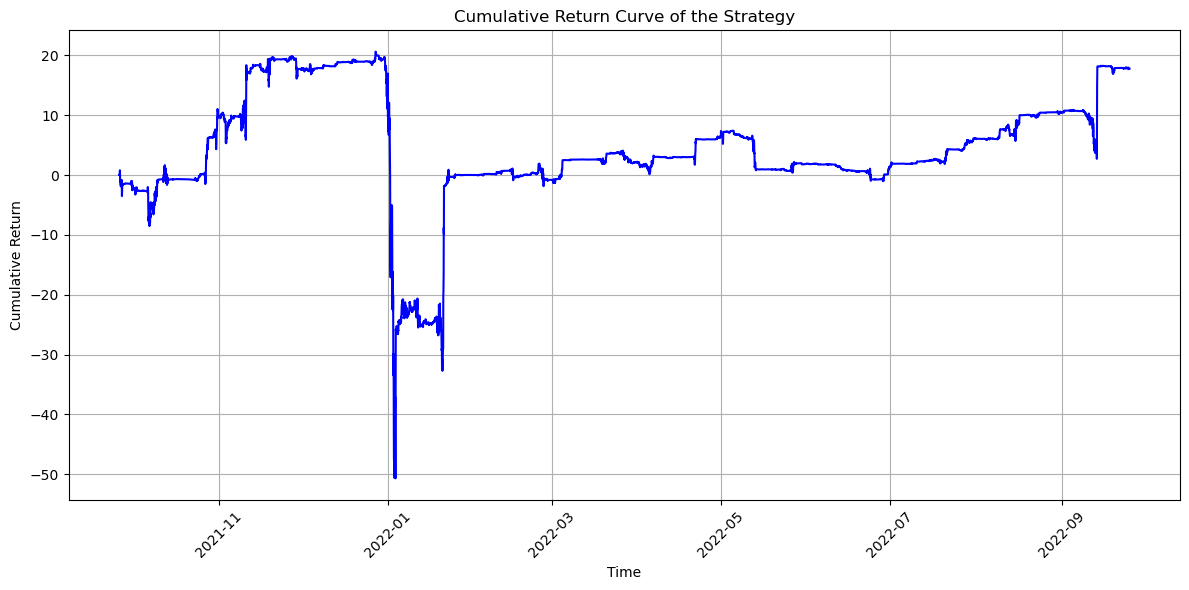

In [20]:
returns_df = backtest.portfolio_value
returns_df = returns_df.dropna()
# Calculate the cumulative return
returns_df['CumulativeReturn'] = (1 + returns_df['Return']).cumprod() - 1

# Plotting the cumulative return curve
plt.figure(figsize=(12, 6))
plt.plot(returns_df['Time'], returns_df['CumulativeReturn'], color='blue')
plt.title('Cumulative Return Curve of the Strategy')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

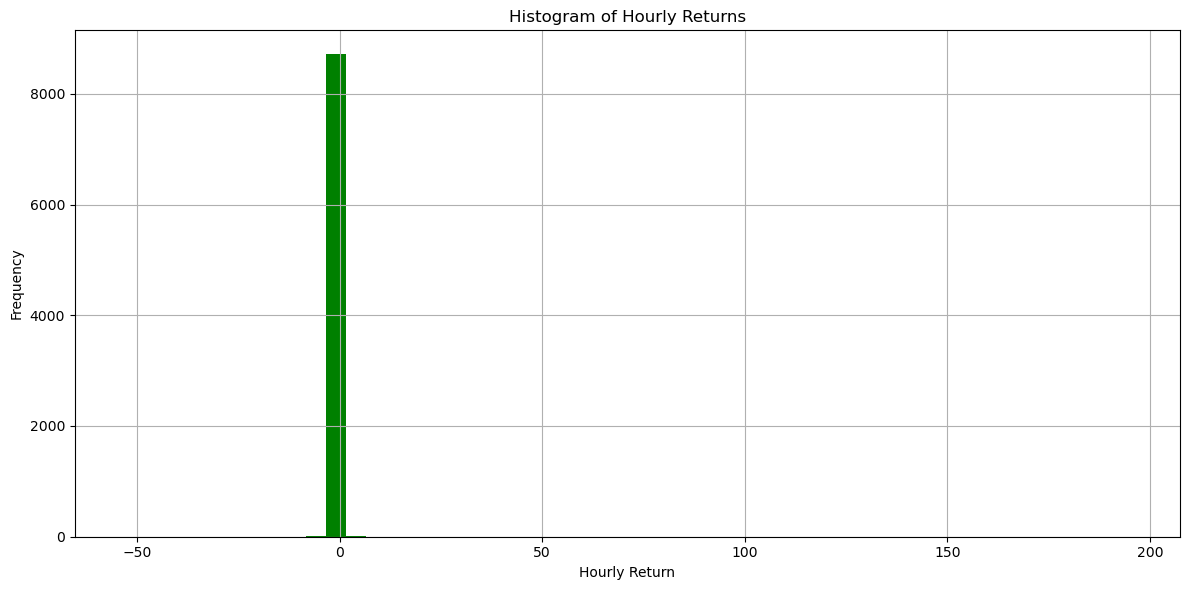

In [21]:
# Plotting the histogram of hourly returns
plt.figure(figsize=(12, 6))
plt.hist(returns_df['Return'], bins=50, color='green')
plt.title('Histogram of Hourly Returns')
plt.xlabel('Hourly Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Show the plots
plt.show()

In [22]:
print("Here is the Sharpe ratio")
sharpe_ratio = backtest.calculate_sharpe_ratio()
print(sharpe_ratio)

Here is the Sharpe ratio
0.627483597202618


In [23]:
print("Here is the maximum drawdown")
maximum_drawdown = backtest.calculate_maximum_drawdown()
print(maximum_drawdown)

Here is the maximum drawdown
-5.1990804974490565
